In [ ]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

results_all = {}

In [ ]:
data=pd.read_csv(r"C:\Users\HP\Masaüstü/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are no null values. So,we skipped Feature Engineering.

In [ ]:
#seperating  
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
len(np.unique(X['cap-color']))

10

Class column is response and rest columns are predictors.

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# X = X.apply(LabelEncoder().fit_transform)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
y    #POISONOUS=1,EATABLE=0

array([1, 0, 0, ..., 0, 1, 0])

Given data is in character or string.We converted int integers to apply Machine Learning Algorithms.

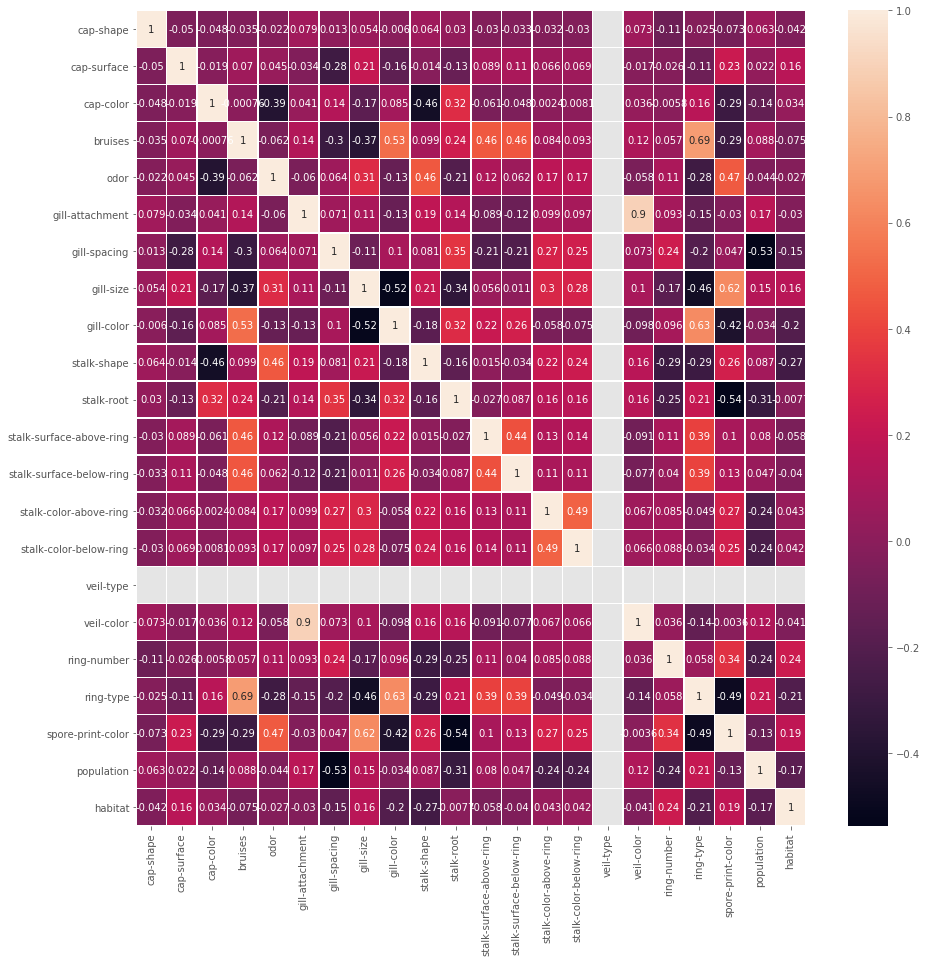

In [ ]:
# Using Advanced Plotting Tool to plot correlation 
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, linewidths=.5)
plt.show()

In [ ]:
# np.unique(X['veil-type'])

Veil Type feature is only one type as we can see in Above Heatmp. Its not correlating to any other feature.

In [ ]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Getting dummy variables

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.preprocessing import StandardScaler#normalize
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


We used StandardScaler to help standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


PCA reduced the dimensionality of a dataset consisting of many variables correlated with each other.The number of variables is not too high,We used PCA to see which variables describe the maximum variance in data

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dt =DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train))))
res = cross_val_score(dt, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8936

Standard Deviation:	0.0104


In [ ]:
print("Test results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test))))

results_all['DecisionTreeClassifier']= [{'Training Acc: ': float("{:.4f}".format(res.mean())), 'Test Acc: ' : float("{:.4f}".format(accuracy_score(y_test,dt.predict(X_test))))}]

Test results:

Accuracy Score: 0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1257
           1       0.90      0.89      0.90      1181

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438




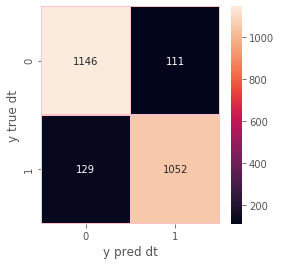

In [ ]:
y_pred_dt = dt.predict(X_test)
y_true_dt = y_test
cm = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="pink",fmt = ".00f",ax=ax)
plt.xlabel("y pred dt")
plt.ylabel("y true dt")
plt.show()

1191 data predicted true,247 data predicted wrong.

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt)
dt_auc = auc(fpr, tpr)
print(dt_auc)

0.9012325220930444


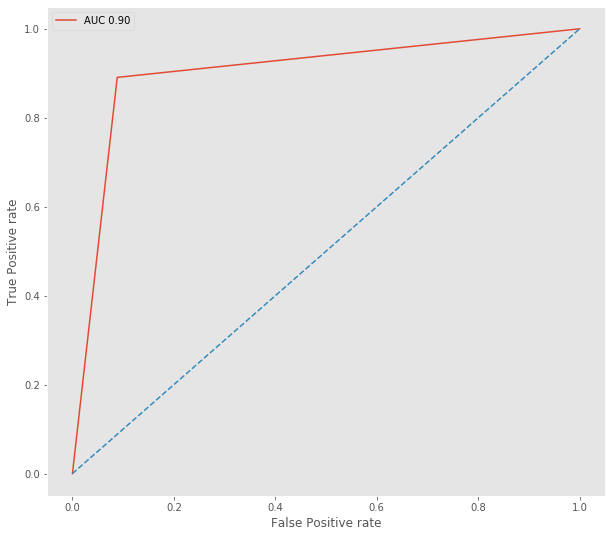

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % dt_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

For Auc, ideal value is 1.Decision tree classifier AUC value is nearly "0.898396919671516".

In [ ]:
# TRYING TO SEARCH THE BEST SET OF PARAMETERS FOR RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
params_set = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}
CV_model = GridSearchCV(estimator=model, param_grid = params_set, cv= 5)
CV_model.fit(X_train, y_train)

print(CV_model.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}


In [ ]:

# rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth=8, random_state = 42)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train))))
res = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))
       

Training results:

Accuracy Score: 0.9432

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2951
           1       0.97      0.91      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.95      0.94      0.94      5686


Confusion Matrix:
[[2886   65]
 [ 258 2477]]

Average Accuracy:	0.9325

Standard Deviation:	0.0098


In [ ]:
print("Test results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,rf.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,rf.predict(X_test))))

results_all['RandomForestClassifier']= [{'Training Acc: ': float("{:.4f}".format(res.mean())), 'Test Acc: ' : float("{:.4f}".format(accuracy_score(y_test,rf.predict(X_test))))}]


Test results:

Accuracy Score: 0.9303

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1257
           1       0.97      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438




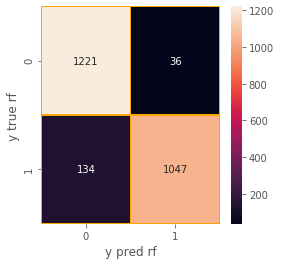

In [ ]:
y_pred_rf = rf.predict(X_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="orange",fmt = ".00f",ax=ax)
plt.xlabel("y pred rf")
plt.ylabel("y true rf")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_rf)
rf_auc = auc(fpr, tpr)
print(rf_auc)

0.9289486075268925


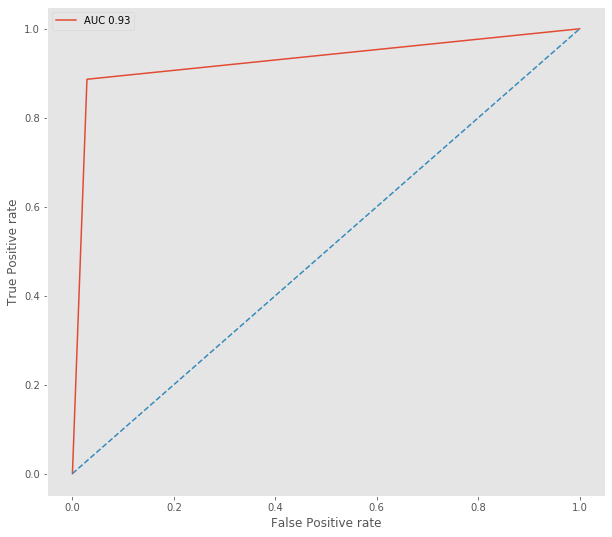

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % rf_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train))))
res = cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))
       

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0098


In [ ]:
print("Test results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test))))

results_all['LogisticRegression']= [{'Training Acc: ': float("{:.4f}".format(res.mean())), 'Test Acc: ' : float("{:.4f}".format(accuracy_score(y_test,lr.predict(X_test))))}]
results_all

Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438




{'DecisionTreeClassifier': [{'Training Acc: ': 0.8936, 'Test Acc: ': 0.9016}],
 'RandomForestClassifier': [{'Training Acc: ': 0.9325, 'Test Acc: ': 0.9303}],
 'LogisticRegression': [{'Training Acc: ': 0.9057, 'Test Acc: ': 0.9028}]}

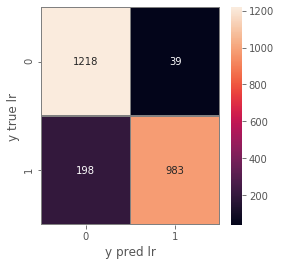

In [ ]:
y_pred_lr = lr.predict(X_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="grey",fmt = ".00f",ax=ax)
plt.xlabel("y pred lr")
plt.ylabel("y true lr")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_lr)
lr_auc = auc(fpr, tpr)
print(lr_auc)

0.9006596084787173


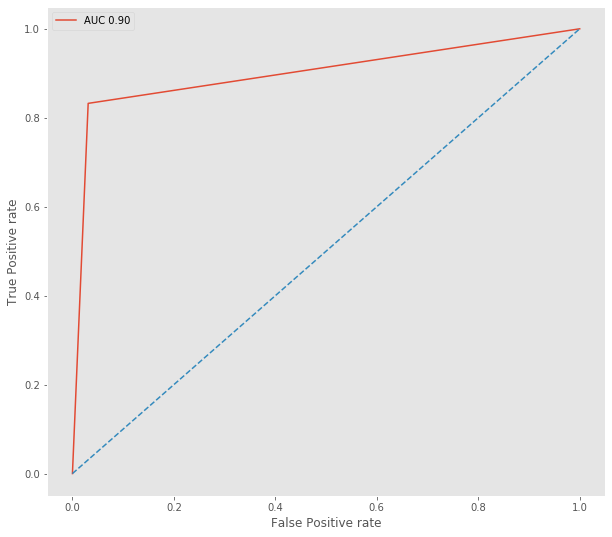

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % lr_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN()
params_set = { 
    'n_neighbors': [5,10,15,20]
}
CV_model = GridSearchCV(estimator=model, param_grid = params_set, cv= 5)
CV_model.fit(X_train, y_train)

print(CV_model.best_params_)

{'n_neighbors': 20}


In [ ]:
knn = KNN(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train))))
res = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))
       

Training results:

Accuracy Score: 0.9388

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2951
           1       0.97      0.90      0.93      2735

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2868   83]
 [ 265 2470]]

Average Accuracy:	0.9340

Standard Deviation:	0.0096


In [ ]:
print("Test results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,knn.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test))))

results_all['KNN']= [{'Training Acc: ': float("{:.4f}".format(res.mean())), 'Test Acc: ' : float("{:.4f}".format(accuracy_score(y_test,knn.predict(X_test))))}]


Test results:

Accuracy Score: 0.9323

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1257
           1       0.97      0.89      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438




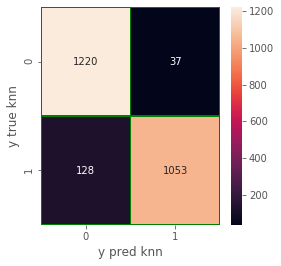

In [ ]:
y_pred_knn = knn.predict(X_test)
y_true_knn = y_test
cm = confusion_matrix(y_true_knn, y_pred_knn)
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="green",fmt = ".00f",ax=ax)
plt.xlabel("y pred knn")
plt.ylabel("y true knn")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_knn)
knn_auc = auc(fpr, tpr)
print(knn_auc)

0.931091055205161


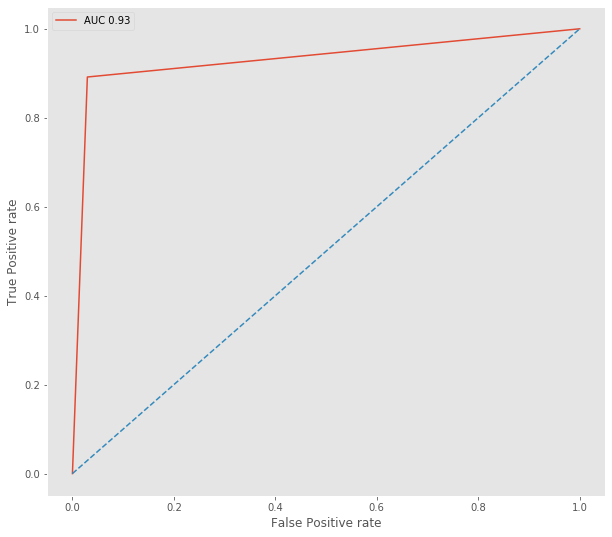

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % knn_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,nb.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,nb.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,nb.predict(X_train))))
res = cross_val_score(nb, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))
       

Training results:

Accuracy Score: 0.8980

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2845  106]
 [ 474 2261]]

Average Accuracy:	0.8982

Standard Deviation:	0.0114


In [ ]:
print("Test results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,nb.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,nb.predict(X_test))))

results_all['NaiveBayes']= [{'Training Acc: ': float("{:.4f}".format(res.mean())), 'Test Acc: ' : float("{:.4f}".format(accuracy_score(y_test,nb.predict(X_test))))}]


Test results:

Accuracy Score: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438




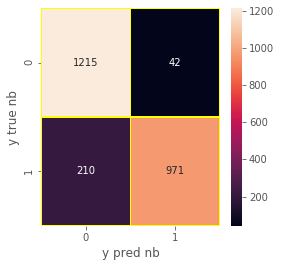

In [ ]:
y_pred_nb = nb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="yellow",fmt = ".00f",ax=ax)
plt.xlabel("y pred nb")
plt.ylabel("y true nb")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_nb)
nb_auc = auc(fpr, tpr)
print(nb_auc)

0.8943858507514566


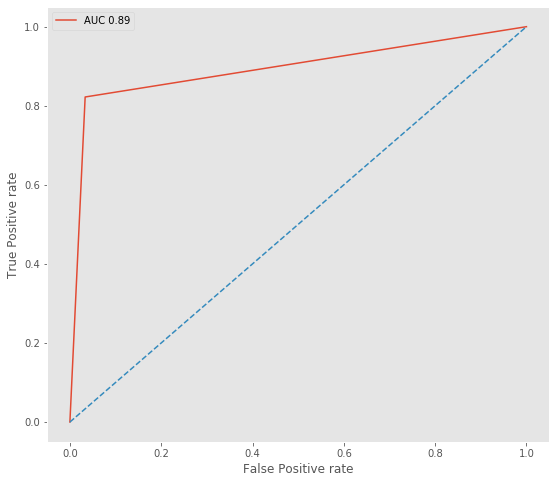

In [ ]:
plt.figure(figsize=(9,8))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % nb_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [ ]:
from sklearn.svm import SVC
model = SVC()
params_set = {
    'C': [0.1,1],
    'gamma': [1,0.1],
    'kernel': ['rbf', 'poly', 'sigmoid']
    }
CV_model = GridSearchCV(estimator=model, param_grid = params_set, cv= 5)
CV_model.fit(X_train, y_train)

print(CV_model.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
svc = SVC(C=1, gamma=1, kernel='rbf',random_state=42)
svc.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svc.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svc.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svc.predict(X_train))))
res = cross_val_score(svc, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))
       

Training results:

Accuracy Score: 0.9323

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2951
           1       0.97      0.89      0.93      2735

    accuracy                           0.93      5686
   macro avg       0.94      0.93      0.93      5686
weighted avg       0.93      0.93      0.93      5686


Confusion Matrix:
[[2867   84]
 [ 301 2434]]

Average Accuracy:	0.9318

Standard Deviation:	0.0091


In [ ]:
print("Test results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svc.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,svc.predict(X_test))))

results_all['SVM']= [{'Training Acc: ': float("{:.4f}".format(res.mean())), 'Test Acc: ' : float("{:.4f}".format(accuracy_score(y_test,svc.predict(X_test))))}]


Test results:

Accuracy Score: 0.9290

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1257
           1       0.97      0.88      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438




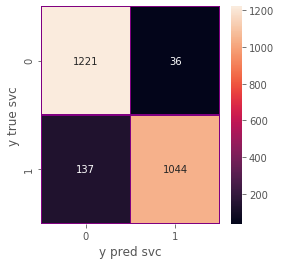

In [ ]:
y_pred_svc =svc.predict(X_test)
y_true_svc = y_test
cm = confusion_matrix(y_true_svc, y_pred_svc)
f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="purple",fmt = ".00f",ax=ax)
plt.xlabel("y pred svc")
plt.ylabel("y true svc")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_svc)
svc_auc = auc(fpr, tpr)
print(svc_auc)

0.927678497450686


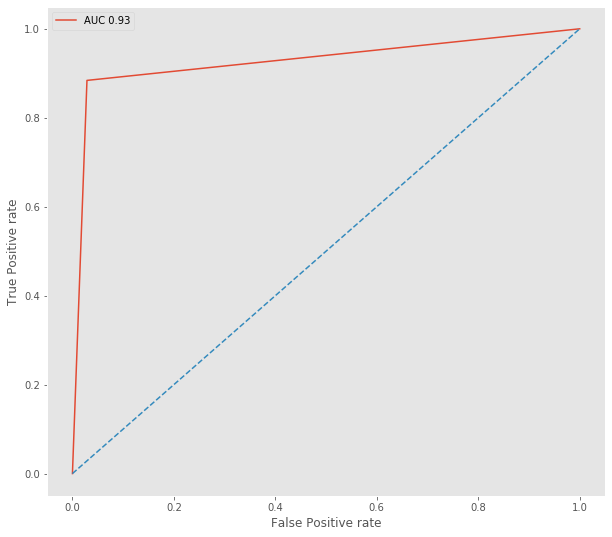

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % svc_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [ ]:
import json
print(json.dumps(results_all, indent=4, sort_keys=True))

{
    "DecisionTreeClassifier": [
        {
            "Test Acc: ": 0.9016,
            "Training Acc: ": 0.8936
        }
    ],
    "KNN": [
        {
            "Test Acc: ": 0.9323,
            "Training Acc: ": 0.934
        }
    ],
    "LogisticRegression": [
        {
            "Test Acc: ": 0.9028,
            "Training Acc: ": 0.9057
        }
    ],
    "NaiveBayes": [
        {
            "Test Acc: ": 0.8966,
            "Training Acc: ": 0.8982
        }
    ],
    "RandomForestClassifier": [
        {
            "Test Acc: ": 0.9303,
            "Training Acc: ": 0.9325
        }
    ],
    "SVM": [
        {
            "Test Acc: ": 0.929,
            "Training Acc: ": 0.9318
        }
    ]
}


I get average result with cross validation.I applied cross validation for each model.It affects each model equally.I got good average predictions of models.In decision tree classifier my data split randomly that's why test accuracy higher than training accuracy.Difference is a very less.One more reason is that i took the average og my traning result.I wrote the mean in my train accuracy.I thought it is not problem

There are several performance metrics to evaluate classification models. Accuracy is the best metric to measure performance relatively. As the accuracy values approach 1, the accuracy rate of our estimates increases and our model gives a better result. It is directly proportional to the success of this model. I can also say that it has a better accuracy when the difference between training accuracy and test accuracy is small.Looking at all these data, the K-Nearest Neighbor algorithm, which has the closest accuracy value to 1 and has the least difference between training accuracy and test accuracy, is the most suitable algorithm for my model.According to results KNN is the best model of project.My performance sorting like this KNN > RandomForest > SVC > LogisticRegression > DecisionTree > NaiveBayes.